<a href="https://colab.research.google.com/github/Joon-hub/DataScience_Concepts/blob/main/Logistic_regression_with_regularization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

# display all columns
pd.set_option('display.max_columns', None)

In [12]:
df = load_breast_cancer()


target = pd.DataFrame(df.data, columns=df.feature_names)
features = pd.DataFrame(df.target, columns=['target'])

df = pd.concat([features,target], axis=1)
display(df.head())

X = df.drop('target', axis=1)
y = df['target']
print(X.shape,y.shape)


,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(569, 30) (569,)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Initialize parameters
m= X_train.shape[0] # Number of samples
n = X_train.shape[1] # Number of features

w = np.zeros(n) # Initialise weights
b = 0
learning_rate = 0.01
num_iterations = 100


# sigmoid function
def sigmoid(z):
  # return 1/(1+np.exp(-z))
  return 1 / (1 + np.exp(-z))

Loss = []
# Gradient descent
for i in range(num_iterations):

  # Forward pass
  z = np.dot(X_train, w) + b
  y_pred = sigmoid(z)

  # claculate gradients
  error = y_pred - y_train


  dw = (1/m) * np.dot(X_train.T, error) # single value output
  db = (1/m) * np.sum(error)

  # Update parameters with gradient clipping
  dw = np.clip(dw, -1, 1)
  db = np.clip(db, -1, 1)

  w = w - learning_rate * dw
  b = b - learning_rate * db

  loss = -np.mean(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred))
  Loss.append(loss)
  if i % 10 == 0:
    print(f"Iteration {i}: Loss = {loss:.4f}")


print(w,b)

Iteration 0: Loss = 0.6931
Iteration 10: Loss = 0.5452
Iteration 20: Loss = 0.4595
Iteration 30: Loss = 0.4039
Iteration 40: Loss = 0.3646
Iteration 50: Loss = 0.3352
Iteration 60: Loss = 0.3123
Iteration 70: Loss = 0.2937
Iteration 80: Loss = 0.2784
Iteration 90: Loss = 0.2654
[-0.15511553 -0.10311621 -0.15626868 -0.14855809 -0.06991746 -0.10107259
 -0.12885663 -0.1603564  -0.06062835  0.02993658 -0.11019899  0.00482328
 -0.10346045 -0.10395004  0.01793344 -0.01662075 -0.00835572 -0.05291235
  0.01138511  0.02818117 -0.16863832 -0.11947751 -0.16743651 -0.15635946
 -0.09669214 -0.11221624 -0.12619038 -0.16445324 -0.10148628 -0.05242612] 0.09831635582874765


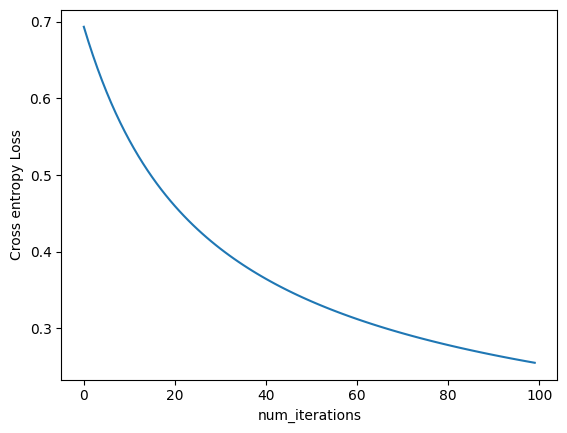

In [24]:
# plot the loss and num_iterations
import matplotlib.pyplot as plt
plt.plot(np.arange(num_iterations), Loss)
plt.xlabel('num_iterations')
plt.ylabel('Cross entropy Loss')
plt.show()

In [25]:
def predict(X):
  z = np.dot(X, w) + b
  y_pred = sigmoid(z)
  return np.round(y_pred)

y_pred = predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9737


## Adding regularization term

### L2 Penalty Term

In [30]:
# Initialize parameters
m = X_train.shape[0]  # Number of samples
n = X_train.shape[1]  # Number of features

w = np.zeros(n)  # Initialize weights
b = 0
learning_rate = 0.01
lambda_reg = 10000  # Regularization strength
num_iterations = 100

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -709, 709)))  # Clipping for numerical stability

Loss = []
# Gradient descent
for i in range(num_iterations):
    # Forward pass
    z = np.dot(X_train, w) + b
    y_pred = sigmoid(z)

    # Calculate gradients
    error = y_pred - y_train
    dw = (1 / m) * np.dot(X_train.T, error) + (lambda_reg / m) * w  # L2 penalty term
    db = (1 / m) * np.sum(error)

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    # Compute regularized loss
    loss = -np.mean(y_train * np.log(y_pred + 1e-15) + (1 - y_train) * np.log(1 - y_pred + 1e-15))
    loss += (lambda_reg / (2 * m)) * np.sum(w**2)  # Add L2 penalty to the loss
    Loss.append(loss)

    if i % 10 == 0:
        print(f"Iteration {i}: Loss = {loss:.4f}")

# Print final weights and bias
print("Final weights and bias:")
print(w, b)

# Predict function
def predict(X):
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    return np.round(y_pred)

# Evaluate model
y_pred = predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.4f}")


Iteration 0: Loss = 0.6953
Iteration 10: Loss = 0.6540
Iteration 20: Loss = 0.6515
Iteration 30: Loss = 0.6500
Iteration 40: Loss = 0.6486
Iteration 50: Loss = 0.6473
Iteration 60: Loss = 0.6460
Iteration 70: Loss = 0.6448
Iteration 80: Loss = 0.6437
Iteration 90: Loss = 0.6426
Final weights and bias:
[-0.01392569 -0.00826013 -0.01416785 -0.01341513 -0.00714666 -0.01116146
 -0.01301543 -0.0149913  -0.00659218  0.00060204 -0.01026001  0.00015667
 -0.0099915  -0.00975433  0.0012703  -0.00448129 -0.00376045 -0.00706689
  0.00010903 -0.0003805  -0.01490527 -0.00933888 -0.01502838 -0.01397482
 -0.00843582 -0.01131178 -0.01250124 -0.01529549 -0.0086752  -0.00595953] 0.1138880335632396
Accuracy: 0.8860


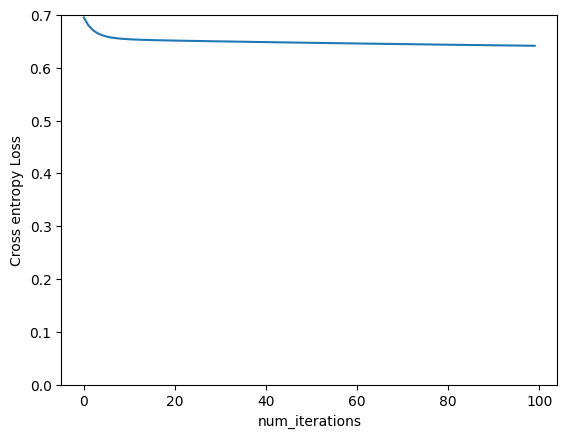

In [31]:
# plot the loss and num_iterations
import matplotlib.pyplot as plt
plt.plot(np.arange(num_iterations), Loss)
plt.xlabel('num_iterations')
plt.ylabel('Cross entropy Loss')
plt.ylim(0,0.7)
plt.show()

### L1 Penalty term

In [37]:
# Initialize parameters
m = X_train.shape[0]  # Number of samples
n = X_train.shape[1]  # Number of features

w = np.zeros(n)  # Initialize weights
b = 0
learning_rate = 0.01
lambda_reg = 0.001  # Regularization strength
num_iterations = 100

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -709, 709)))  # Clipping for numerical stability

Loss = []
# Gradient descent
for i in range(num_iterations):
    # Forward pass
    z = np.dot(X_train, w) + b
    y_pred = sigmoid(z)

    # Calculate gradients
    error = y_pred - y_train
    dw = (1 / m) * np.dot(X_train.T, error) + (lambda_reg / m) * np.sum(np.abs(w))  # L1 penalty term
    db = (1 / m) * np.sum(error)

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    # Compute regularized loss
    loss = -np.mean(y_train * np.log(y_pred + 1e-15) + (1 - y_train) * np.log(1 - y_pred + 1e-15))
    loss = loss + (lambda_reg / (2 * m)) * np.sum(np.abs(w))  # Add L1 penalty to the loss
    Loss.append(loss)

    if i % 10 == 0:
      print(f"Iteration {i}: Loss = {loss:.4f}")

# Print final weights and bias
print("Final weights and bias:")
print(w, b)

# Predict function
def predict(X):
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    return np.round(y_pred)

# Evaluate model
y_pred = predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.4f}")


Iteration 0: Loss = 0.6931
Iteration 10: Loss = 0.5452
Iteration 20: Loss = 0.4595
Iteration 30: Loss = 0.4039
Iteration 40: Loss = 0.3646
Iteration 50: Loss = 0.3352
Iteration 60: Loss = 0.3123
Iteration 70: Loss = 0.2937
Iteration 80: Loss = 0.2784
Iteration 90: Loss = 0.2654
Final weights and bias:
[-0.15511852 -0.10311927 -0.15627158 -0.14856109 -0.0699201  -0.10107473
 -0.12885875 -0.1603587  -0.06063094  0.02993381 -0.11020181  0.00482001
 -0.10346327 -0.10395309  0.01793026 -0.01662308 -0.00835809 -0.05291459
  0.01138199  0.02817866 -0.16864119 -0.11948053 -0.16743931 -0.15636239
 -0.09669485 -0.11221857 -0.1261926  -0.16445552 -0.10148911 -0.0524286 ] 0.0983159563423515
Accuracy: 0.9737


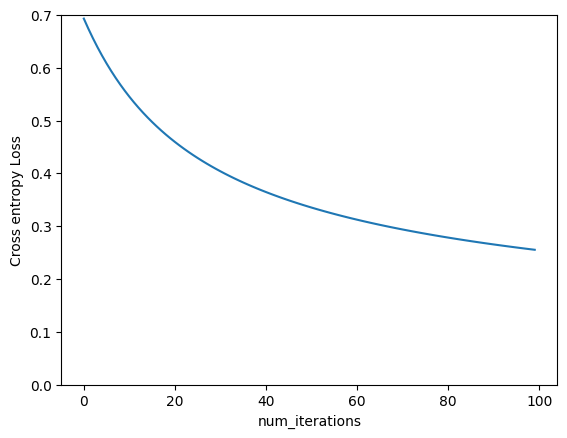

In [38]:
# plot the loss and num_iterations
import matplotlib.pyplot as plt
plt.plot(np.arange(num_iterations), Loss)
plt.xlabel('num_iterations')
plt.ylabel('Cross entropy Loss')
plt.ylim(0,0.7)
plt.show()